## 1372. Longest ZigZag Path in a Binary Tree

<div class="elfjS" data-track-load="description_content"><p>You are given the <code>root</code> of a binary tree.</p>

<p>A ZigZag path for a binary tree is defined as follow:</p>

<ul>
	<li>Choose <strong>any </strong>node in the binary tree and a direction (right or left).</li>
	<li>If the current direction is right, move to the right child of the current node; otherwise, move to the left child.</li>
	<li>Change the direction from right to left or from left to right.</li>
	<li>Repeat the second and third steps until you can't move in the tree.</li>
</ul>

<p>Zigzag length is defined as the number of nodes visited - 1. (A single node has a length of 0).</p>

<p>Return <em>the longest <strong>ZigZag</strong> path contained in that tree</em>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2020/01/22/sample_1_1702.png" style="width: 221px; height: 383px;">
<pre><strong>Input:</strong> root = [1,None,1,1,1,None,None,1,1,None,1,None,None,None,1]
<strong>Output:</strong> 3
<strong>Explanation:</strong> Longest ZigZag path in blue nodes (right -&gt; left -&gt; right).
</pre>

<p><strong class="example">Example 2:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2020/01/22/sample_2_1702.png" style="width: 157px; height: 329px;">
<pre><strong>Input:</strong> root = [1,1,1,None,1,None,None,1,1,None,1]
<strong>Output:</strong> 4
<strong>Explanation:</strong> Longest ZigZag path in blue nodes (left -&gt; right -&gt; left -&gt; right).
</pre>

<p><strong class="example">Example 3:</strong></p>

<pre><strong>Input:</strong> root = [1]
<strong>Output:</strong> 0
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li>The number of nodes in the tree is in the range <code>[1, 5 * 10<sup>4</sup>]</code>.</li>
	<li><code>1 &lt;= Node.val &lt;= 100</code></li>
</ul>
</div>

In [1]:
import numpy as np
from typing import List, Optional
%load_ext memory_magics

# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [2]:
from graphviz import Digraph
from collections import deque 

def build_tree(values):
    if not values:
        return None
    iter_values = iter(values)
    root = TreeNode(next(iter_values))
    queue = deque([root])
    while queue:
        node = queue.popleft()
        try:
            left_val = next(iter_values)
            if left_val is not None:
                node.left = TreeNode(left_val)
                queue.append(node.left)
            right_val = next(iter_values)
            if right_val is not None:
                node.right = TreeNode(right_val)
                queue.append(node.right)
        except StopIteration:
            break
    return root

def plot_tree(node, graph=None, node_id=0):
    if graph is None:
        graph = Digraph()
        graph.attr(size='8,8')
    if node is not None:
        graph.node(str(node_id), str(node.val))
        if node.left:
            graph.edge(str(node_id), str(2 * node_id + 1))
            plot_tree(node.left, graph, 2 * node_id + 1)
        if node.right:
            graph.edge(str(node_id), str(2 * node_id + 2))
            plot_tree(node.right, graph, 2 * node_id + 2)
    return graph

## Solution 1

In [3]:
class Solution:
    def longestZigZag(self, root: TreeNode) -> int:
        if not root:
            return 0
        
        def dfs(node, direction, length):
            nonlocal max_length
            if not node:
                return
            max_length = max(max_length, length)
            if direction == 'left':
                dfs(node.left, 'right', length + 1)
                dfs(node.right, 'left', 1)
            else:
                dfs(node.right, 'left', length + 1)
                dfs(node.left, 'right', 1)
        
        max_length = 0
        dfs(root.left, 'right', 1)
        dfs(root.right, 'left', 1)
        return max_length
       
            

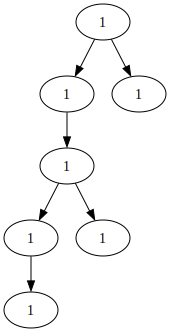

In [4]:
tree1 = build_tree(iter([1,1,1,None,1,None,None,1,1,None,1]))
plot_tree(tree1)

In [5]:
%%time
solution = Solution()
solution.longestZigZag(tree1)

CPU times: user 26 µs, sys: 4 µs, total: 30 µs
Wall time: 31.7 µs


4